### Bank Churners

#### Importing Data
First, we'll need to import data into Python as a data object. We can use the `pandas` library to easily import the data from the `.csv` file into a dataframe.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("BankChurners.csv")
print(type(df))
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


Next, we'll remove the last 2 columns since we don't need them.

In [2]:
del df["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"]
del df["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]

print(df.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


#### Cleaning Data
Next, we'll have to clean the data. This step involves transforming the data according to our needs and making the data easier for us to use.

##### Attrition_Flag
The values in this column are either *Existing Customer* or *Attrited Customer*. To keep the column unchanged, we'll just create a new column called **Is_Account_Closed** with value 1 to specify an attrited customer or 0 to specify an existing customer.

In [3]:
df["Is_Account_Closed"] = np.nan
df.loc[df["Attrition_Flag"] == "Existing Customer", "Is_Account_Closed"] = 0
df.loc[df["Attrition_Flag"] == "Attrited Customer", "Is_Account_Closed"] = 1

print(df["Attrition_Flag"].value_counts(sort=True), "\n")
print(df["Is_Account_Closed"].value_counts(sort=True))

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 

0.0    8500
1.0    1627
Name: Is_Account_Closed, dtype: int64


##### Gender
The values in this column are either *F* or *M*. We'll be creating a new column called **Is_Male** with a value 1 if male and 0 if female.

In [4]:
df["Is_Male"] = np.nan
df.loc[df["Gender"] == "F", "Is_Male"] = 0
df.loc[df["Gender"] == "M", "Is_Male"] = 1

print(df["Gender"].value_counts(sort=True), "\n")
print(df["Is_Male"].value_counts(sort=True))

F    5358
M    4769
Name: Gender, dtype: int64 

0.0    5358
1.0    4769
Name: Is_Male, dtype: int64


##### Education_Level
The values in this column can vary, but the only value we want to change is from *Unknown* to *NaN*.

In [5]:
print(df["Education_Level"].value_counts(sort=True), "\n")

df.loc[df["Education_Level"] == "Unknown", "Education_Level"] = np.nan

print(df["Education_Level"].value_counts(sort=True, dropna=False))

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64 

Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


##### Marital_Status
Similar to **Education_Level**, we want to change *Unknown* to *NaN*.

In [6]:
print(df["Marital_Status"].value_counts(sort=True), "\n")

df.loc[df["Marital_Status"] == "Unknown", "Marital_Status"] = np.nan

print(df["Marital_Status"].value_counts(sort=True, dropna=False))

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64 

Married     4687
Single      3943
NaN          749
Divorced     748
Name: Marital_Status, dtype: int64


##### Income_Category
Similar to **Education_Level**, we want to change *Unknown* to *NaN*.

In [7]:
print(df["Income_Category"].value_counts(sort=True), "\n")

df.loc[df["Income_Category"] == "Unknown", "Income_Category"] = np.nan

print(df["Income_Category"].value_counts(sort=True, dropna=False))

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64 

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
NaN               1112
$120K +            727
Name: Income_Category, dtype: int64


#### Renaming Columns
We're now renaming some columns to make the column names consistent with the form `Pascal_Case`.

These are the column names to change:
- Dependent_count => Dependent_Count
- Months_on_book => Months_On_Book
- Months_Inactive_12_mon => Months_Inactive_12_Mon
- Contacts_Count_12_mon => Contacts_Count_12_Mon

In [8]:
df = df.rename(columns={"Dependent_count": "Dependent_Count", "Months_on_book": "Months_On_Book", "Months_Inactive_12_mon": "Months_Inactive_12_Mon", "Contacts_Count_12_mon": "Contacts_Count_12_Mon"})

Let's see the final columns that we have.

In [9]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_Count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_On_Book',
       'Total_Relationship_Count', 'Months_Inactive_12_Mon',
       'Contacts_Count_12_Mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Is_Account_Closed', 'Is_Male'],
      dtype='object')

Now, we can save this dataframe as a clean pickle file.

In [10]:
pd.to_pickle(df, "bank-churners-clean.pkl")

#### Single Variable Explorations
In this stage, we'll be examining the variables, finding out what they each mean. Since this chapter is only about distributions and histograms, we'll be using those to examine the variables.

First, let's setup everything needed to plot the variables into distribution graphs.

In [11]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from cycler import cycler

matplotlib.style.use("dark_background")
%matplotlib inline
rcParams["figure.figsize"] = (6, 6)
rcParams["axes.prop_cycle"] = cycler(color=["#4299E1", "#F56565"])
rcParams["axes.facecolor"] = "#1A202C"
rcParams["axes.edgecolor"] = "#A0AEC0"
rcParams["axes.grid"] = True
rcParams["grid.color"] = "#A0AEC0"
rcParams["grid.alpha"] = 0.7
rcParams["axes.titlecolor"] = "#A0AEC0"
rcParams["axes.labelcolor"] = "#A0AEC0"
rcParams["xtick.color"] = "#A0AEC0"
rcParams["ytick.color"] = "#A0AEC0"

##### CLIENTNUM
This is a unique id associated with a customer holding the account, usually randomized.

##### Attrition_Flag (Is_Account_Closed)
This determines if the customer's account is still active or has been closed. This column has been transformed and changed to **Is_Account_Closed**. A value of 1 means the account is closed, 0 otherwise.

Text(0, 0.5, 'Probability')

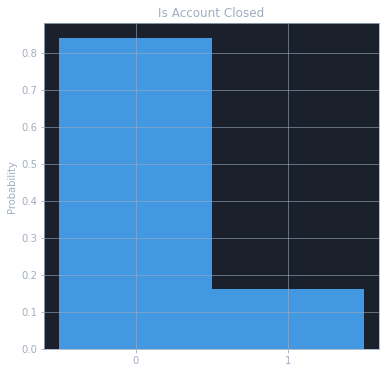

In [12]:
df["Is_Account_Closed"].plot.hist(bins=[-0.5, 0.5, 1.5], density=True)
plt.xticks([0, 1])
plt.title("Is Account Closed")
plt.ylabel("Probability")

##### Customer_Age - Demographic
The customer's age in years.

Text(0, 0.5, 'Frequency')

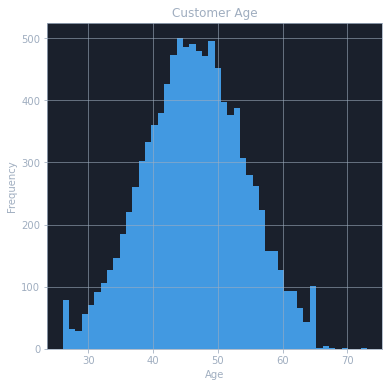

In [13]:
df["Customer_Age"].plot.hist(bins=48)
plt.title("Customer Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

##### Gender (Is_Male) - Demographic
The gender of the customer. This column has been transformed and changed to **Is_Male**. A value of 1 means the customer is male, 0 if female.

Text(0, 0.5, 'Probability')

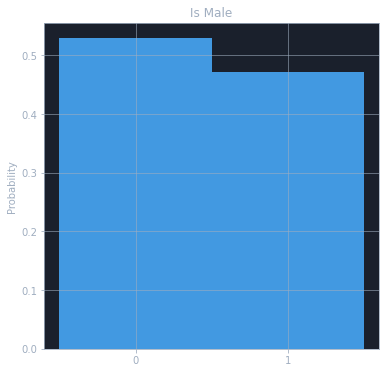

In [14]:
df["Is_Male"].plot.hist(bins=[-0.5, 0.5, 1.5], density=True)
plt.xticks([0, 1])
plt.title("Is Male")
plt.ylabel("Probability")

##### Dependent_Count - Demographic
Number of dependents that the customer has.

Text(0, 0.5, 'Frequency')

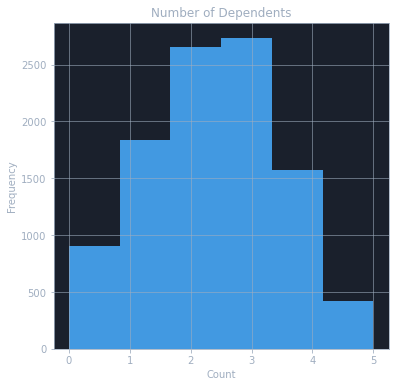

In [15]:
df["Dependent_Count"].plot.hist(bins=6)
plt.title("Number of Dependents")
plt.xlabel("Count")
plt.ylabel("Frequency")

##### Education_Level - Demographic
The level of education that the customer has.

AxesSubplot(0.125,0.125;0.775x0.755)


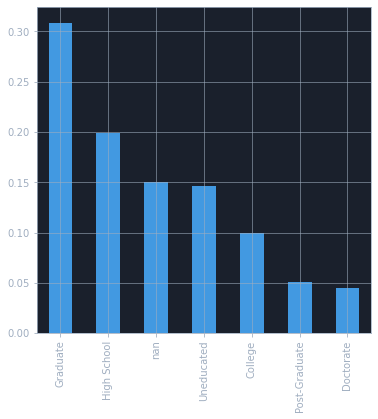

In [16]:
def PrintCountValues(col):
    #print(df[col].value_counts(normalize=True, dropna=False).mul(100).round(2).astype(str) + " %")
    print(df[col].value_counts(normalize=True, dropna=False).plot.bar())

PrintCountValues("Education_Level")

##### Marital_Status - Demographic
The marital status that the customer has.

AxesSubplot(0.125,0.125;0.775x0.755)


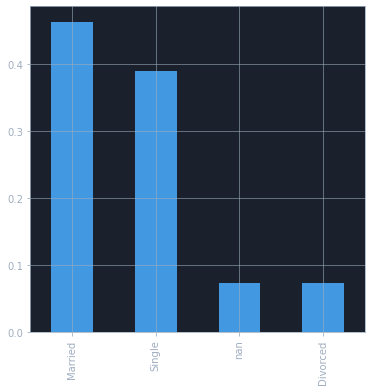

In [17]:
PrintCountValues("Marital_Status")

##### Income_Category - Demographic
The income group that the customer is in.

AxesSubplot(0.125,0.125;0.775x0.755)


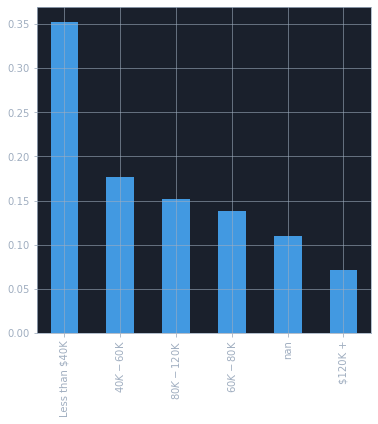

In [18]:
PrintCountValues("Income_Category")

##### Card_Category - Product
The type of card that the customer has.

AxesSubplot(0.125,0.125;0.775x0.755)


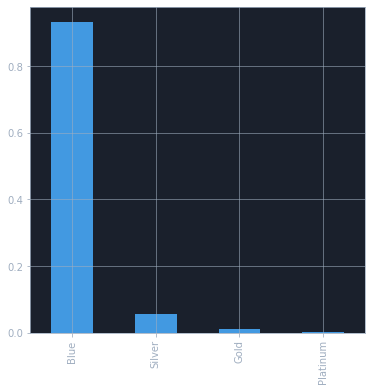

In [19]:
PrintCountValues("Card_Category")

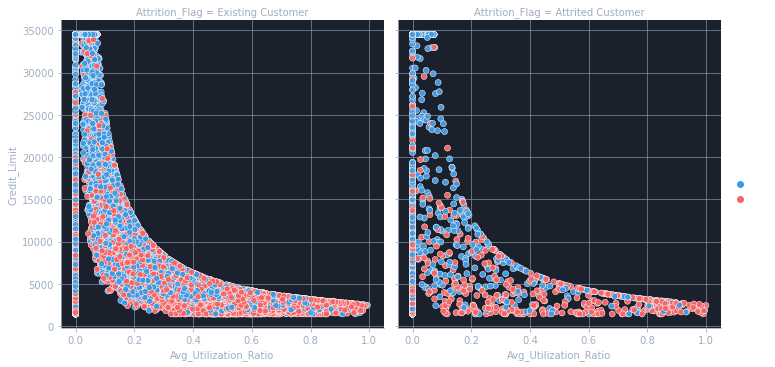

In [20]:
import seaborn as sns
sns.relplot(x="Avg_Utilization_Ratio", y="Credit_Limit", col="Attrition_Flag", hue="Gender", data=df)